In [1]:
%cd ../fiberphotopy/
import importlib
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import pprint
import scipy
import time


import fp_utils
import behavioral_data
import fiber_data
import analysis

def rel():
    importlib.reload(behavioral_data)
    importlib.reload(fiber_data)
    importlib.reload(analysis)
    importlib.reload(fp_utils)
rel()

dataf = '../../DATA/FIGURES/'

C:\Users\mceau\Documents\fiberphotopy\fiberphotopy


# Behavioral summary

In [2]:
gb11 = behavioral_data.BehavioralData('../../DATA/j36/bsa22032022c20_01.dat')

Importing ../../DATA/j36/bsa22032022c20_01.dat...
Importing of ../../DATA/j36/bsa22032022c20_01.dat finished in 0.06895923614501953 seconds


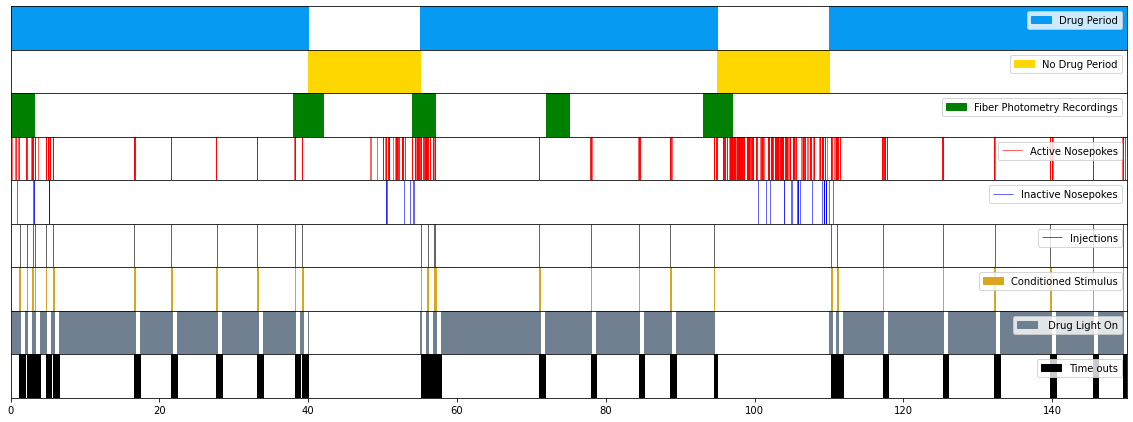

In [3]:
gb11.summary()
plt.savefig(dataf+'summary.svg',dpi=1200)

# Data selection

In [4]:
gb11.__dict__.keys()

dict_keys(['hello', 'configfile', 'config', 'rat_ID', 'file_unit', 'user_unit', 'experiment_duration', 'fixed_ratio', 'close_interval', 'elements', 'df', 'custom', 'filepath', 'start', 'end', 'time_ratio', 'hled_on', 'hled_off', 'led1_on', 'led1_off', 'led2_on', 'led2_off', 'np1', 'np2', 'inj1', 'ttl1_on', 'ttl1_off', 'rec_start', 'HLED_ON', 'HLED_OFF', 'LED1_ON', 'LED1_OFF', 'LED2_ON', 'LED2_OFF', 'TTL1_ON', 'TTL1_OFF', 'DARK', 'TO_DARK', 'TIMEOUT', 'NOTO_DARK', 'switch_d_nd', 'switch_to_nd', 'switch_nd_d', 'switch_dto_nd', 'np1_1', 'np1_2', 'np1_3', 'np1_4', 'np1_5', 'D_1', 'D_2', 'D_3', 'ND_1', 'ND_2', 'x', 'y', 'xytime'])

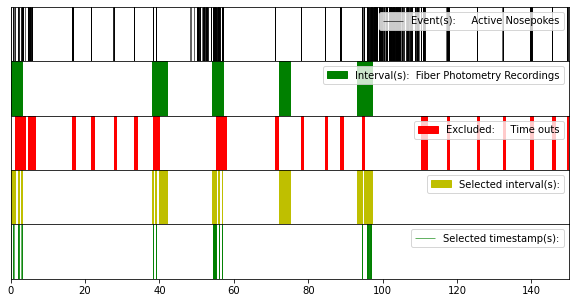

In [5]:
gb11.export_timestamps(events='np1',interval='TTL1_ON',exclude='TIMEOUT',to_csv=False,figsize=(10,5))
plt.ylabel('Time (min)')
plt.legend()
plt.savefig(dataf+'selection.svg',dpi=1200)

# Perievent plotting

In [6]:
AS21Rsessions = analysis.MultiSession("../../DATA/AS21R",debug=800)
switch_DND = AS21Rsessions.analyze(['switch_d_nd','switch_to_nd'])


Importing folder rat_10_SA_1...
Importing ../../DATA/AS21R/rat_10_SA_1/bsa02032022c20_01.dat...
Importing of ../../DATA/AS21R/rat_10_SA_1/bsa02032022c20_01.dat finished in 0.03897690773010254 seconds
Analyzing peaks...


C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Importing of ../../DATA/AS21R/rat_10_SA_1/AS21RSA1Rat1002032022_0.csv finished in 1.880856990814209 seconds

Importing folder rat_10_SA_2...
Importing ../../DATA/AS21R/rat_10_SA_2/bsa08032022c20_02.dat...
Importing of ../../DATA/AS21R/rat_10_SA_2/bsa08032022c20_02.dat finished in 0.04597330093383789 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R/rat_10_SA_2/AS21RSA2Rat1008032022_0.csv finished in 1.0867962837219238 seconds

Importing folder rat_11_SA_1...
Importing ../../DATA/AS21R/rat_11_SA_1/bsa03032022c20_01.dat...
Importing of ../../DATA/AS21R/rat_11_SA_1/bsa03032022c20_01.dat finished in 0.04497337341308594 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R/rat_11_SA_1/AS21RSA1Rat1103032022_0.csv finished in 1.8538756370544434 seconds

Importing folder rat_11_SA_2...
Importing ../../DATA/AS21R/rat_11_SA_2/bsa09032022c20_02.dat...
Importing of ../../DATA/AS21R/rat_11_SA_2/bsa09032022c20_02.dat finished in 0.06596827507019043 seconds
Analyzing peaks...
Importing of .

Analyzing peaks...
Importing of ../../DATA/AS21R/rat_5_SA_6/AS21RSA6Rat523032022_0.csv finished in 1.779296636581421 seconds

Importing folder rat_5_SA_7...
Importing ../../DATA/AS21R/rat_5_SA_7/bsa28032022c20_01.dat...
Importing of ../../DATA/AS21R/rat_5_SA_7/bsa28032022c20_01.dat finished in 0.0509793758392334 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R/rat_5_SA_7/AS21RSAxRat528032022_0.csv finished in 1.7799193859100342 seconds

Importing folder rat_8_SA_1...
Importing ../../DATA/AS21R/rat_8_SA_1/bsa03032022c20_02.dat...
Importing of ../../DATA/AS21R/rat_8_SA_1/bsa03032022c20_02.dat finished in 0.044973134994506836 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R/rat_8_SA_1/AS21RSA1Rat803032022_0.csv finished in 1.8081474304199219 seconds

Importing folder rat_8_SA_2...
Importing ../../DATA/AS21R/rat_8_SA_2/bsa04032022c20_02.dat...
Importing of ../../DATA/AS21R/rat_8_SA_2/bsa04032022c20_02.dat finished in 0.06040334701538086 seconds
Analyzing peaks...
Importing 

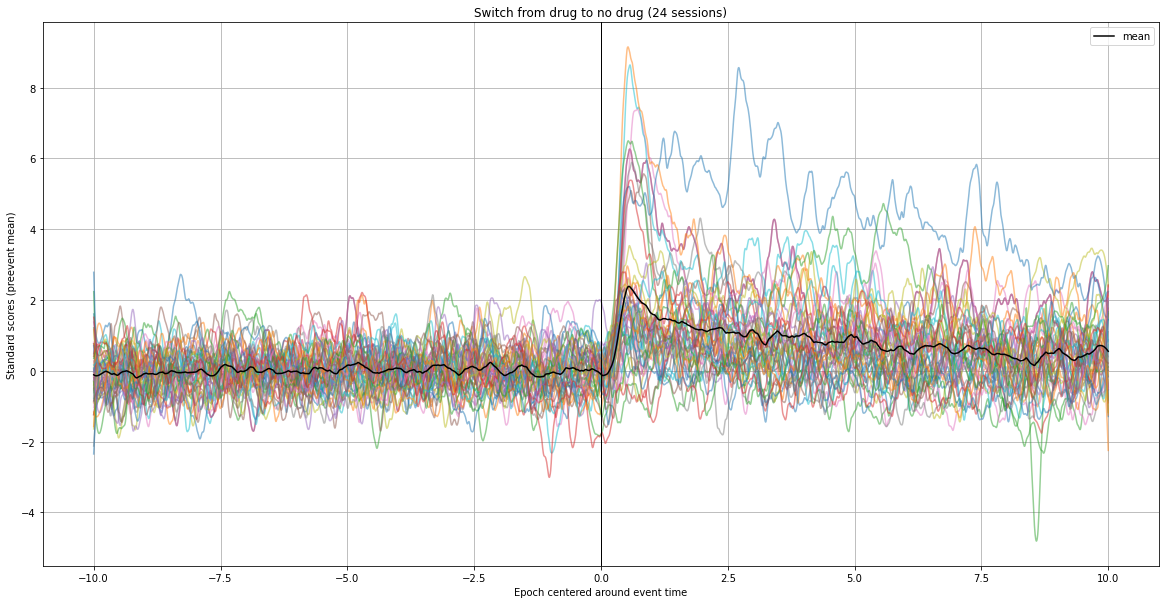

In [7]:
switch_DND.plot('zscores',alpha=0.5,smooth_mean=True,smooth_data=True)
plt.title(f'Switch from drug to no drug ({len(AS21Rsessions.names)} sessions)')
plt.grid(b='True',which='both')
plt.ylabel('Standard scores (preevent mean)')
plt.xlabel('Epoch centered around event time')
plt.legend()
plt.savefig(dataf+'switchDND.svg',dpi=1200)

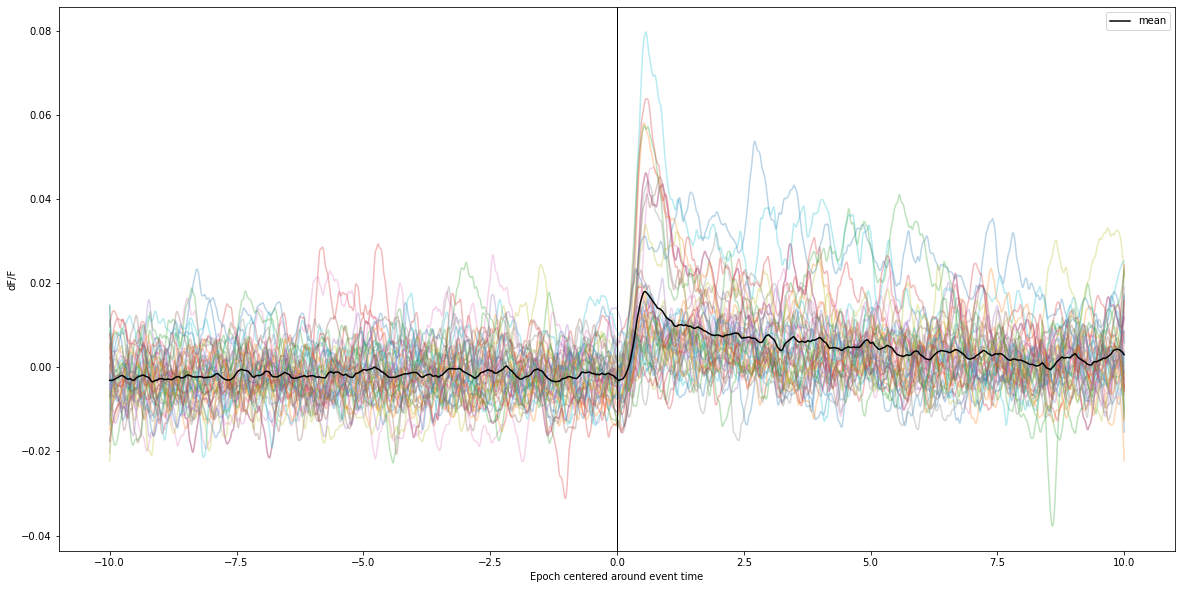

In [14]:
switch_DND.plot('signal')
plt.ylabel('dF/F')
plt.xlabel('Epoch centered around event time')
plt.legend()
plt.savefig(dataf+'switchDND.svg',dpi=1200)

# Basic signal stuff

In [8]:
s11 = fiber_data.FiberData('../../DATA/AS21R/rat_11_SA_6/AS21RSA6Rat1122032022_0.csv')

Analyzing peaks...


C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Importing of ../../DATA/AS21R/rat_11_SA_6/AS21RSA6Rat1122032022_0.csv finished in 1.9774372577667236 seconds


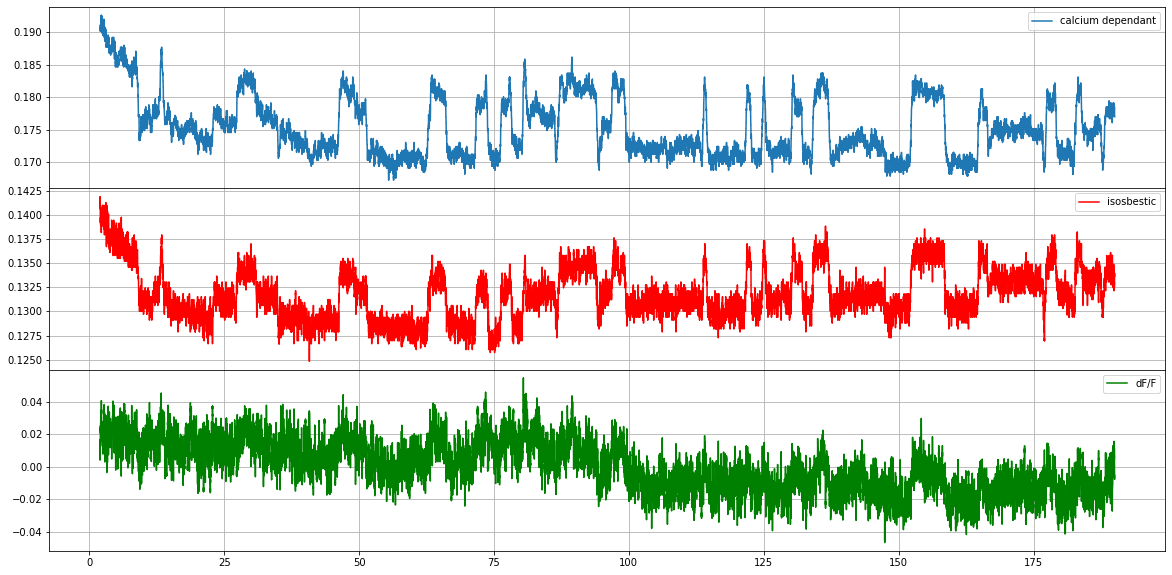

In [9]:
data = s11.norm(rec=1,add_time=True,method='raw')
ti = data[:,0]
si = data[:,1]
co = data[:,2]
no = s11.norm(rec=1,add_time=False)

a = int(np.where(no == no.min())[0][0] - 50)
b = int(np.where(no == no.min())[0][-1] + 50)

time       = np.concatenate((ti[:a],ti[b+1:]))
signal     = np.concatenate((si[:a],si[b+1:]))
control    = np.concatenate((co[:a],co[b+1:]))
normalized = np.concatenate((no[:a],no[b+1:]))

fig,ax = plt.subplots(3,figsize=(20,10))
ax[0].plot(time,signal,label='calcium dependant')
ax[0].tick_params('x', labelbottom=False)
ax[1].plot(time,control,c='r',label='isosbestic')
ax[2].plot(time,normalized,c='g',label='dF/F')
plt.subplots_adjust(hspace=0)
for n in range(3):
    ax[n].grid(b='True',which='both')
    ax[n].legend()
plt.savefig(dataf+'signal_control_norm.svg',dpi=1200)

# Peak analysis

In [10]:
rel()

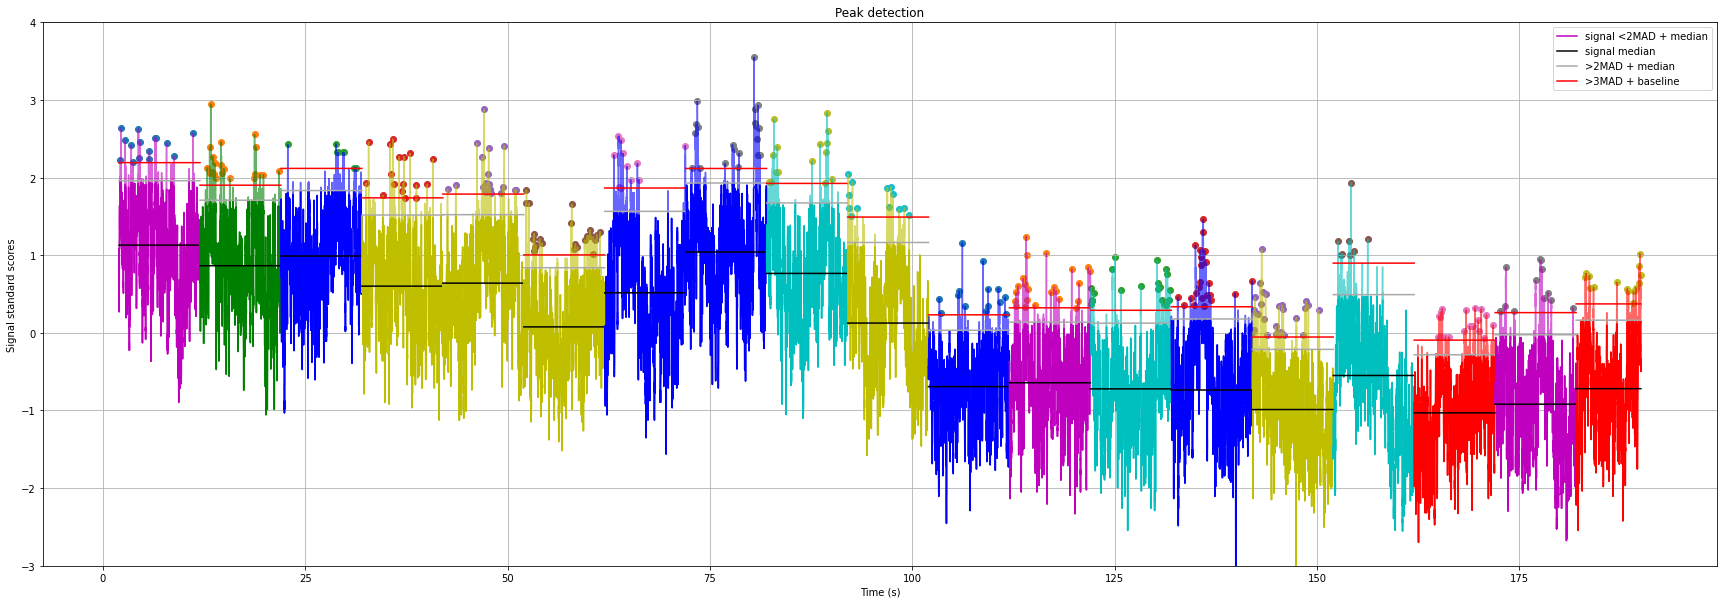

In [11]:
s11.detect_peaks(s11.norm(1)[:,0],s11.norm(1)[:,1])
plt.grid(b='True',which='both')
plt.ylim([-3, 4])
plt.ylabel('Signal standard scores')
plt.xlabel('Time (s)')
plt.title('Peak detection')
plt.savefig(dataf+'peakdetection.svg',dpi=1200)

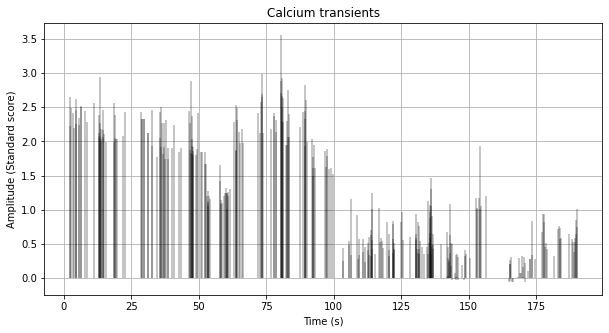

In [12]:
s11.plot_transients(rec=1,figsize=(10,5))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (Standard score)')
plt.title('Calcium transients')
plt.savefig(dataf+'transients.svg',dpi=1200)

# Event plotting